In [1]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler

from sklearn                 import svm
from sklearn.svm             import SVC
from sklearn.metrics         import roc_auc_score
from sklearn.metrics         import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics         import r2_score,accuracy_score
from sklearn.metrics         import classification_report,confusion_matrix
from sklearn                 import metrics
from sklearn.preprocessing   import StandardScaler


In [2]:
Data = pd.read_csv('vehicle.csv')

In [3]:
Data.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [4]:
Data.describe().T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

Looking at the data we can see there are few outliers on few feilds. Try more explorations on the below fields ( radius_ratio,pr.axis_aspect_ratio, max.length_aspect_ratio, scaled_variance, scaled_variance.1, scaled_radius_of_gyration.1, skewness_about , skewness_about.1)

In [6]:
Data.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [7]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

There are few Data which is missing , So as the Data missing is very less we can remove those rows from the Dataset. 

In [8]:
Data1 = Data.dropna()

In [9]:
Data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  813 non-null    int64  
 1   circularity                  813 non-null    float64
 2   distance_circularity         813 non-null    float64
 3   radius_ratio                 813 non-null    float64
 4   pr.axis_aspect_ratio         813 non-null    float64
 5   max.length_aspect_ratio      813 non-null    int64  
 6   scatter_ratio                813 non-null    float64
 7   elongatedness                813 non-null    float64
 8   pr.axis_rectangularity       813 non-null    float64
 9   max.length_rectangularity    813 non-null    int64  
 10  scaled_variance              813 non-null    float64
 11  scaled_variance.1            813 non-null    float64
 12  scaled_radius_of_gyration    813 non-null    float64
 13  scaled_radius_of_gyr

In [10]:
#Since the variable is categorical, you can use value_counts function
pd.value_counts(Data['class'])

car    429
bus    218
van    199
Name: class, dtype: int64

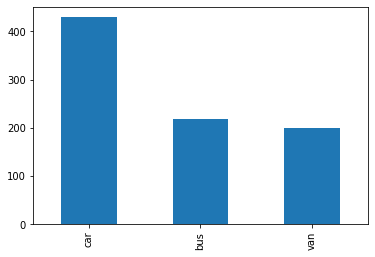

In [11]:
pd.value_counts(Data["class"]).plot(kind="bar")

Check for the outliers in identified fields. 

#1)  Radius Ratio Outlier Check

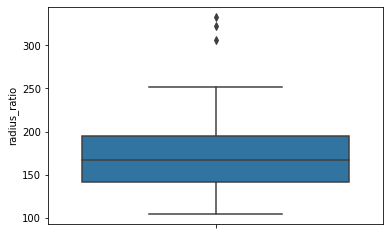

In [12]:
sns.boxplot(y='radius_ratio', data=Data1)

In [13]:
# let us the outlier using the IQR method

IQR = Data1.radius_ratio.quantile(0.75) - Data1.radius_ratio.quantile(0.25)

Lower_fence = Data1.radius_ratio.quantile(0.25) - (IQR * 1.5)
Upper_fence = Data1.radius_ratio.quantile(0.75) + (IQR * 1.5)

Upper_fence, Lower_fence, IQR

(276.0, 60.0, 54.0)

In [14]:
Data2 = Data1[Data1['radius_ratio']> 276]
Data2.count()

compactness                    3
circularity                    3
distance_circularity           3
radius_ratio                   3
pr.axis_aspect_ratio           3
max.length_aspect_ratio        3
scatter_ratio                  3
elongatedness                  3
pr.axis_rectangularity         3
max.length_rectangularity      3
scaled_variance                3
scaled_variance.1              3
scaled_radius_of_gyration      3
scaled_radius_of_gyration.1    3
skewness_about                 3
skewness_about.1               3
skewness_about.2               3
hollows_ratio                  3
class                          3
dtype: int64

In [15]:
# remove the outlier which are extreme 

Data2= Data1[Data1['radius_ratio'] < 276 ]

#2) pr.axis_aspect_ratio outlier Check

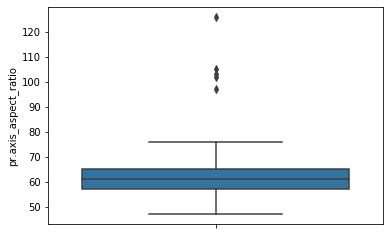

In [17]:
sns.boxplot(y='pr.axis_aspect_ratio', data=Data2)

In [18]:
# Check the outlier above the upper IQR

Data2_new = Data2[Data2['pr.axis_aspect_ratio'] > 120]
Data2_new.count()


compactness                    1
circularity                    1
distance_circularity           1
radius_ratio                   1
pr.axis_aspect_ratio           1
max.length_aspect_ratio        1
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         1
max.length_rectangularity      1
scaled_variance                1
scaled_variance.1              1
scaled_radius_of_gyration      1
scaled_radius_of_gyration.1    1
skewness_about                 1
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  1
class                          1
dtype: int64

In [19]:
#Delete only 1 row which is the extreme outlier. 

Data3 = Data2[Data['pr.axis_aspect_ratio'] < 120]

C:\Users\VIBIVIJAYAN\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


#3) max.length_aspect_ratio outlier check 

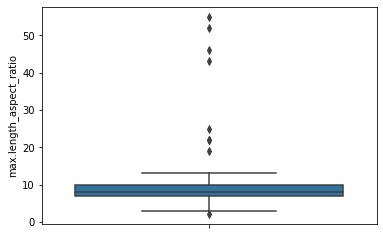

In [20]:
sns.boxplot(y='max.length_aspect_ratio', data=Data3)

In [21]:
# Check the outlier above the upper IQR

Data3_new = Data3[Data3['max.length_aspect_ratio'] > 40]
Data3_new.count()


compactness                    4
circularity                    4
distance_circularity           4
radius_ratio                   4
pr.axis_aspect_ratio           4
max.length_aspect_ratio        4
scatter_ratio                  4
elongatedness                  4
pr.axis_rectangularity         4
max.length_rectangularity      4
scaled_variance                4
scaled_variance.1              4
scaled_radius_of_gyration      4
scaled_radius_of_gyration.1    4
skewness_about                 4
skewness_about.1               4
skewness_about.2               4
hollows_ratio                  4
class                          4
dtype: int64

In [22]:
Data3_new.groupby('class')['max.length_aspect_ratio'].count()

class
bus    1
van    3
Name: max.length_aspect_ratio, dtype: int64

#NOT Deleting the data as the higher lenght aspect ration is for VAN ( Van count is less compared to cars and bus)

#4) Scaled variance outlier Check 

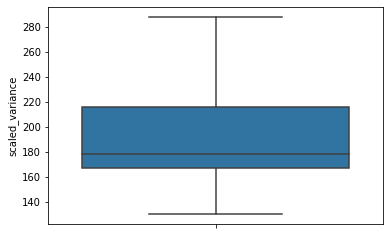

In [23]:
sns.boxplot(y='scaled_variance', data=Data3)

scaled variance looks good. not much of a outliers in the Scaled variance

#5) Scaled Variance.1 Outlier check 

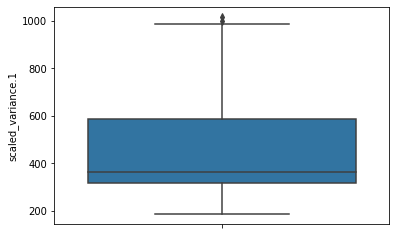

In [24]:
sns.boxplot(y='scaled_variance.1', data=Data3)

In [98]:
#looks like there are few veru high outlier outside the upper fence

In [25]:
# let us the outlier using the IQR method

# put the highesh IQR value with a Standard deviation of 3 

Data3_new = Data3[Data3['scaled_variance.1'] > 1000]
Data3_new.count()



compactness                    1
circularity                    1
distance_circularity           1
radius_ratio                   1
pr.axis_aspect_ratio           1
max.length_aspect_ratio        1
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         1
max.length_rectangularity      1
scaled_variance                1
scaled_variance.1              1
scaled_radius_of_gyration      1
scaled_radius_of_gyration.1    1
skewness_about                 1
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  1
class                          1
dtype: int64

In [26]:
Data4 = Data3[Data3['scaled_variance.1'] < 1000]

In [27]:
Data4.shape

(808, 19)

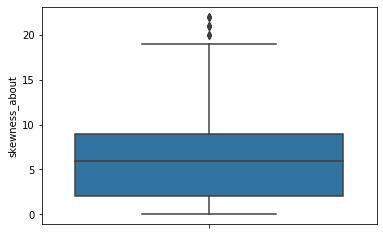

In [28]:
sns.boxplot(y='skewness_about', data=Data3)

In [29]:
# let us the outlier using the IQR method

# put the highesh IQR value with a Standard deviation of 3 

#Data4_new = Data4[Data4['skewness_about'] > 18]
#Data4_new.count()

# let us the outlier using the IQR method

IQR = Data4.skewness_about.quantile(0.75) - Data4.skewness_about.quantile(0.25)

Lower_fence = Data4.skewness_about.quantile(0.25) - (IQR * 1.5)
Upper_fence = Data4.skewness_about.quantile(0.75) + (IQR * 1.5)

Upper_fence, Lower_fence, IQR

(19.5, -8.5, 7.0)

In [30]:
Data4_new = Data4[Data4['skewness_about'] > 19.5]
Data4_new.count()

compactness                    12
circularity                    12
distance_circularity           12
radius_ratio                   12
pr.axis_aspect_ratio           12
max.length_aspect_ratio        12
scatter_ratio                  12
elongatedness                  12
pr.axis_rectangularity         12
max.length_rectangularity      12
scaled_variance                12
scaled_variance.1              12
scaled_radius_of_gyration      12
scaled_radius_of_gyration.1    12
skewness_about                 12
skewness_about.1               12
skewness_about.2               12
hollows_ratio                  12
class                          12
dtype: int64

In [31]:
Data4_new.groupby('class')['skewness_about'].count()

class
car    12
Name: skewness_about, dtype: int64

#Here the Skewness about is for CARS only , So we will keep this data back in the dataset . No delete for this feild. 

In [32]:
Data4.shape


(808, 19)

In [33]:
Data4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 808 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  808 non-null    int64  
 1   circularity                  808 non-null    float64
 2   distance_circularity         808 non-null    float64
 3   radius_ratio                 808 non-null    float64
 4   pr.axis_aspect_ratio         808 non-null    float64
 5   max.length_aspect_ratio      808 non-null    int64  
 6   scatter_ratio                808 non-null    float64
 7   elongatedness                808 non-null    float64
 8   pr.axis_rectangularity       808 non-null    float64
 9   max.length_rectangularity    808 non-null    int64  
 10  scaled_variance              808 non-null    float64
 11  scaled_variance.1            808 non-null    float64
 12  scaled_radius_of_gyration    808 non-null    float64
 13  scaled_radius_of_gyr

In [34]:
#Since the variable is categorical, you can use value_counts function
pd.value_counts(Data4['class'])

car    413
bus    203
van    192
Name: class, dtype: int64

In [35]:
# check again to make sure no NULL are there in the Dataframe. 
Data4.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

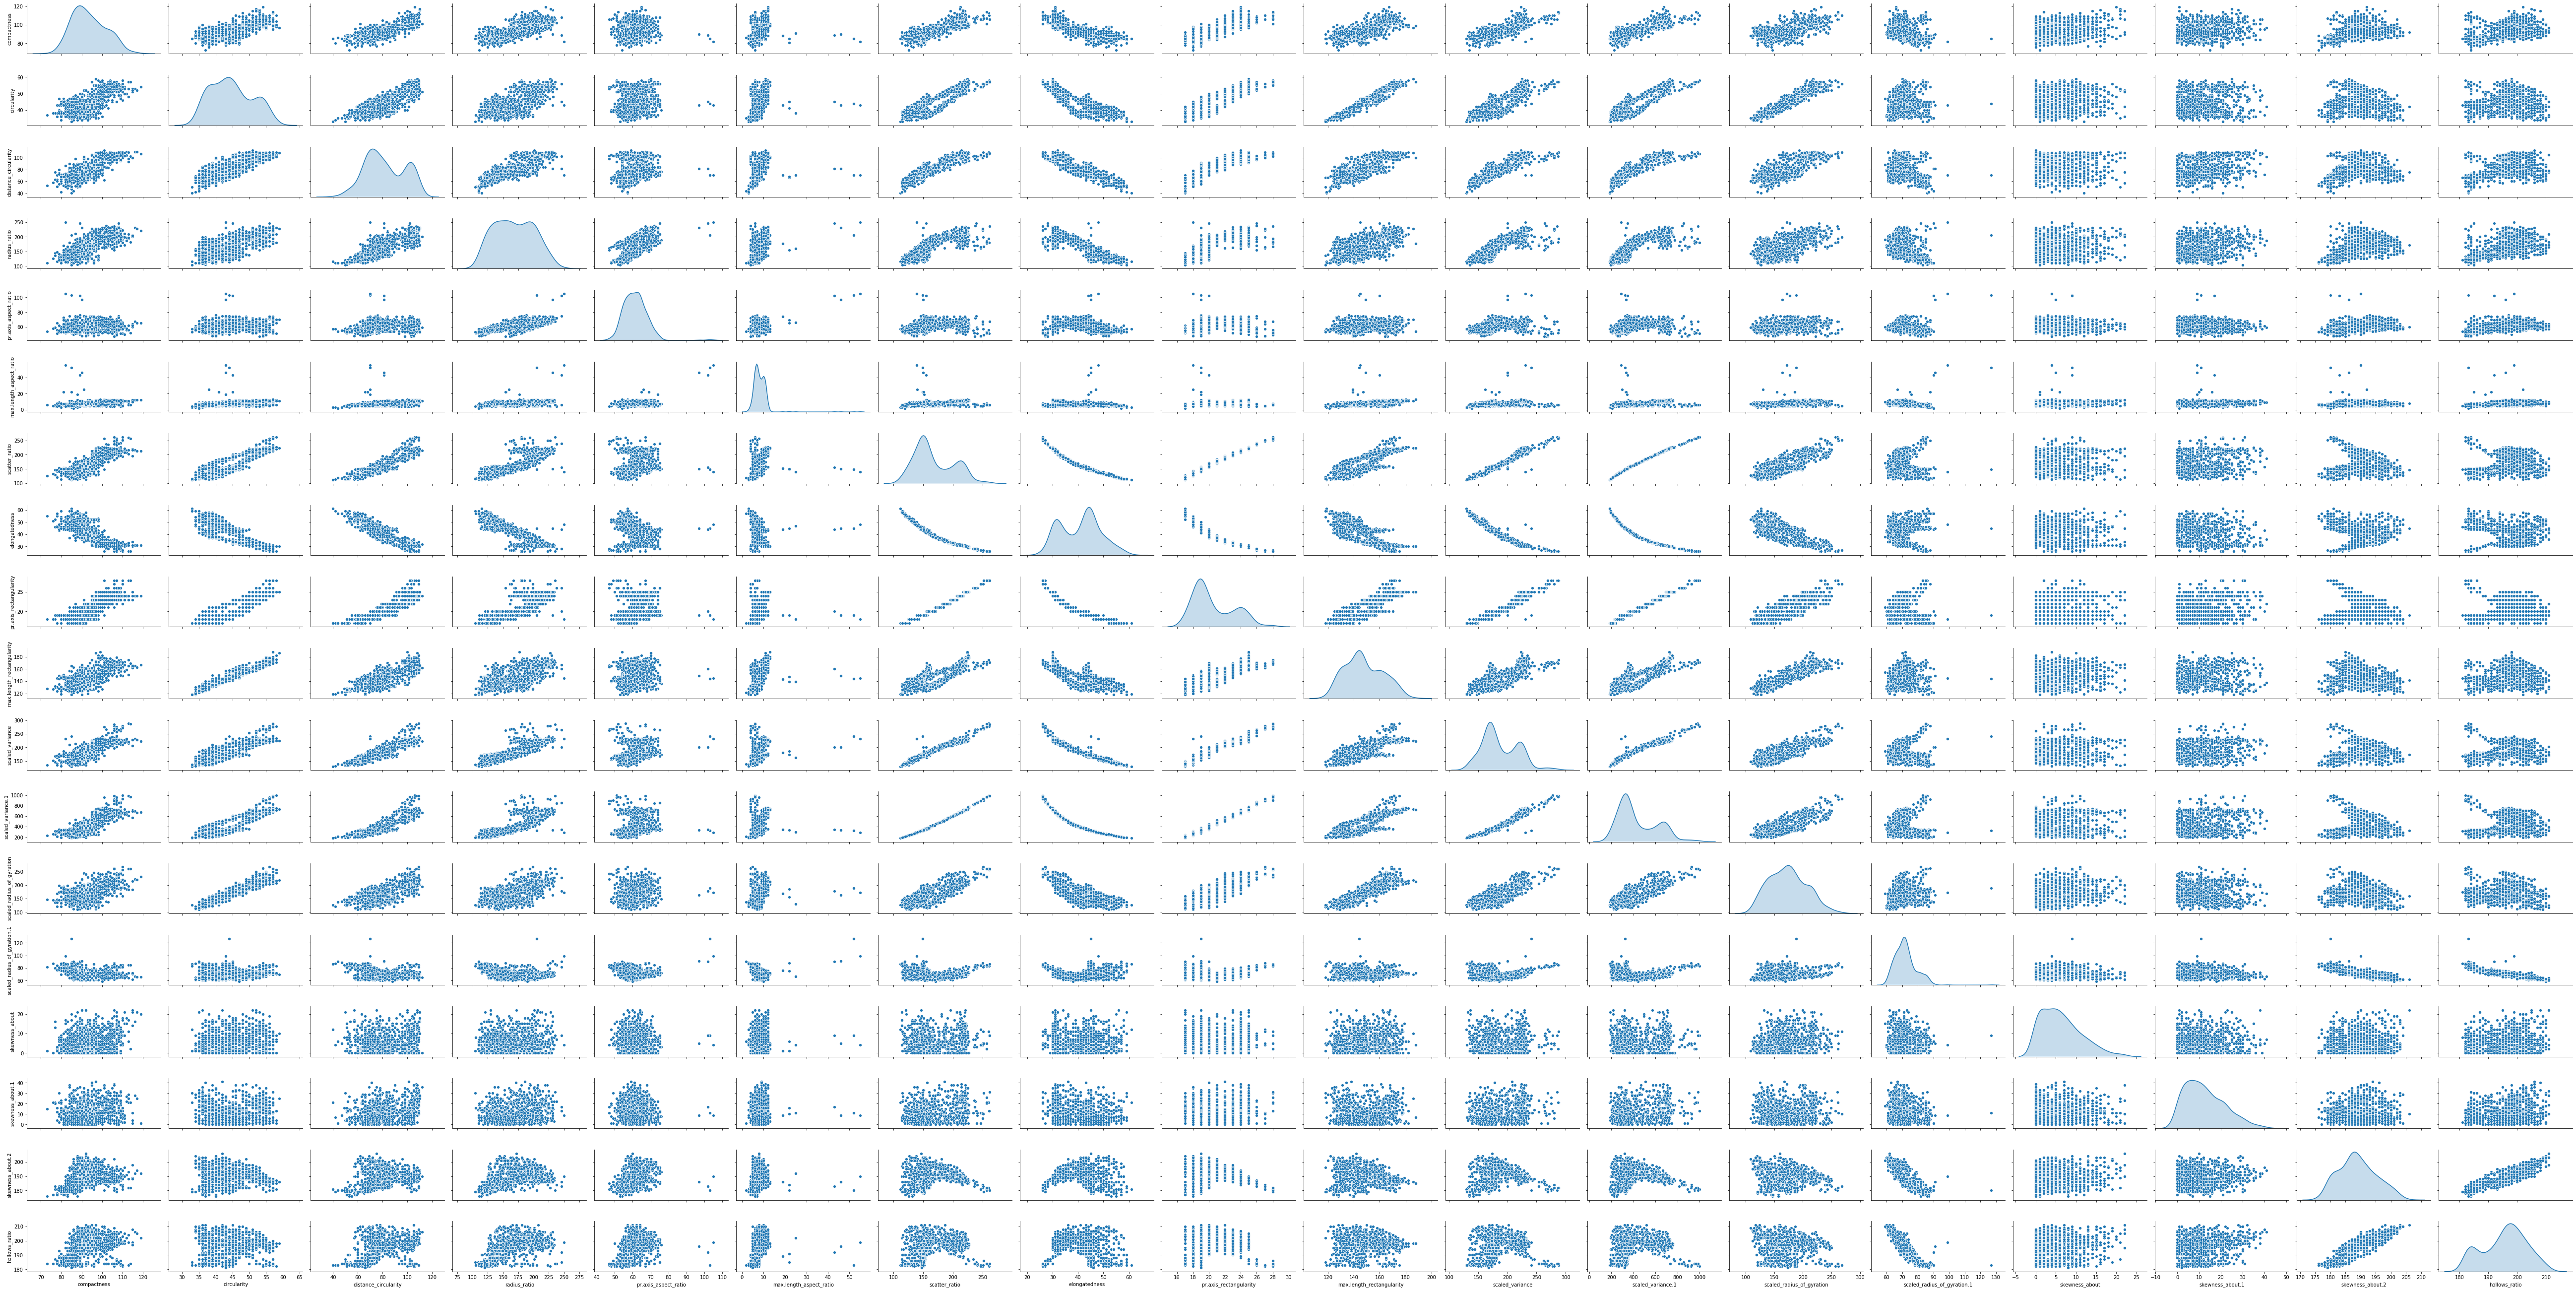

In [36]:
#importing seaborn for statistical plots
sns.pairplot(Data4, height=2,aspect=2 , diag_kind='kde')

#The cluster formation is there in most of the Feilds as there is variation with dip in the Data in pair plot. 

There is almost 3 clusters in all the data elements from the pair plot .

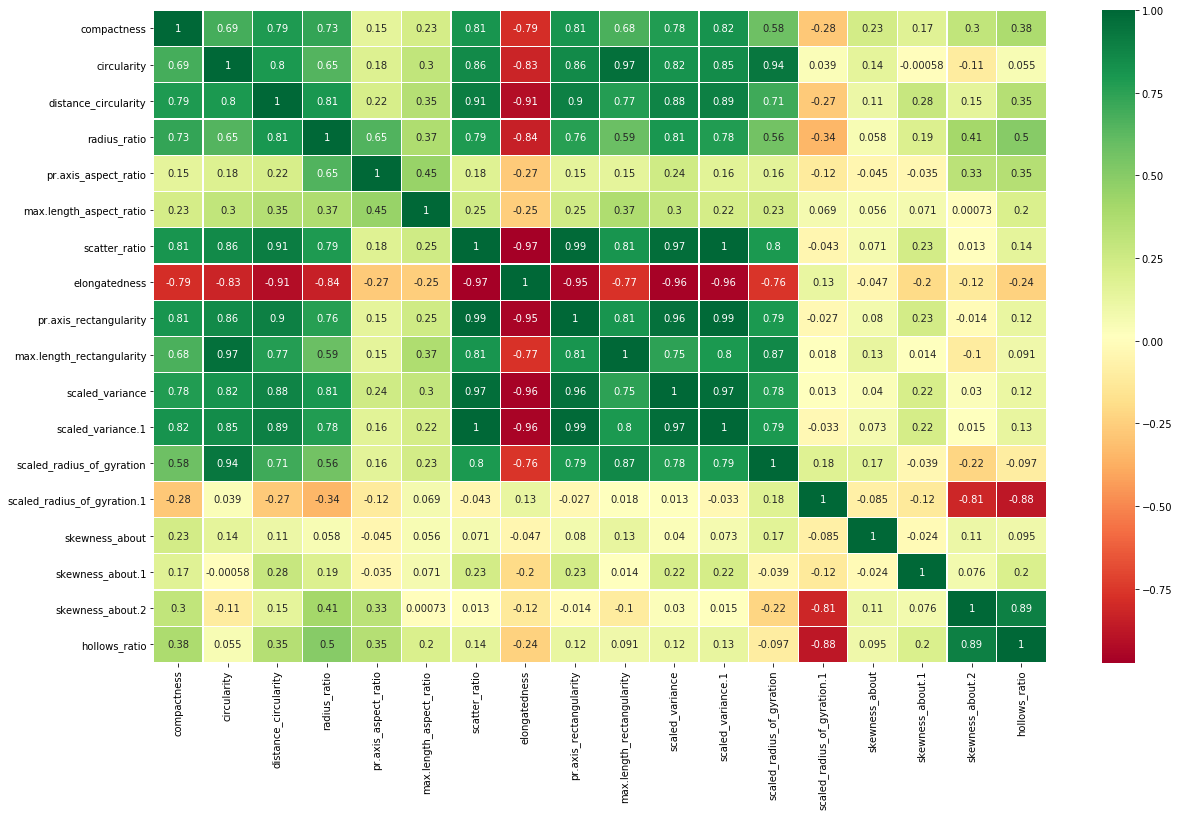

In [37]:
#check the correlation between each variable 
# Top Few rows have good correlation with each other compared to the lower feilds in the Dataframe. 

sns.heatmap(Data4.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

In [38]:
# make sure no Duplicates are there in the Data frame. 
Data4.duplicated().sum()

0

#The Data exploration is done, we have removed around 10 rows more based on the extreme outliier condition as it may impact the classification algorithm

In [112]:
# copy the Data4 to Data_final 

Data_final = Data4.copy(deep=True)
Data_lookup =  Data4.copy(deep=True) 
y=Data_final['class']
Data_final = Data_final.drop('class', axis = 1)


Try the Clustering with Both K MEANS and Heirarichal Clustering technique. 

K MEANS CLUSTERING 

In [113]:
# importing the StandardScaler Module
from sklearn.preprocessing import StandardScaler
# Creating an object for the StandardScaler function
X = StandardScaler()

scaled_df = X.fit_transform(Data_final)

In [41]:
scaled_df

array([[ 0.16308587,  0.52468667,  0.06176214, ...,  0.36838188,
        -0.32691644,  0.16739729],
       [-0.32361176, -0.61495534,  0.12509185, ...,  0.14458296,
        -0.00181061,  0.43791132],
       [ 1.25815554,  0.85029867,  1.51834543, ..., -0.41491432,
        -0.16436353,  0.03214028],
       ...,
       [ 1.50150435,  1.50152267,  1.20169689, ..., -0.97441161,
        -0.32691644,  0.70842535],
       [-0.9319838 , -1.42898535, -0.2548864 , ...,  1.37547699,
         0.1607423 , -0.10311673],
       [-1.05365821, -1.42898535, -1.0148429 , ...,  0.59218079,
        -0.48946935, -0.77940181]])

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

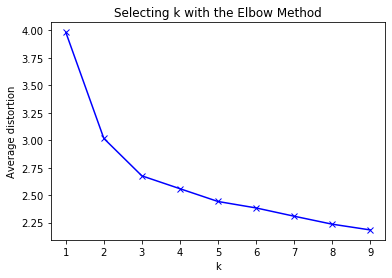

In [42]:
#Finding optimal no. of clusters from elbow graph 

from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(scaled_df)
    prediction=model.predict(scaled_df)
    meanDistortions.append(sum(np.min(cdist(scaled_df, model.cluster_centers_, 'euclidean'), axis=1)) / scaled_df.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

# KMEANS with K = 3

In [43]:
# Let us first start with K = 3 from the above elbow graph

final_model=KMeans(3)
final_model.fit(scaled_df)
prediction=final_model.predict(scaled_df)

#Append the prediction 
Data_lookup["GROUP"] = prediction

print("Groups Assigned : \n")
Data_lookup

Groups Assigned : 



compactness  circularity  distance_circularity  radius_ratio  \
0             95         48.0                  83.0         178.0   
1             91         41.0                  84.0         141.0   
2            104         50.0                 106.0         209.0   
3             93         41.0                  82.0         159.0   
4             85         44.0                  70.0         205.0   
..           ...          ...                   ...           ...   
841           93         39.0                  87.0         183.0   
842           89         46.0                  84.0         163.0   
843          106         54.0                 101.0         222.0   
844           86         36.0                  78.0         146.0   
845           85         36.0                  66.0         123.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                    72.0                       10          162.0   
1                    57.0                        9          149.0   
2                    66.0                       10          207.0   
3                    63.0                        9          144.0   
4                   103.0                       52          149.0   
..                    ...                      ...            ...   
841                  64.0                        8          169.0   
842                  66.0                       11          159.0   
843                  67.0                       12          222.0   
844                  58.0                        7          135.0   
845                  55.0                        5          120.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0             42.0                    20.0                        159   
1             45.0                    19.0                        143   
2             32.0                    23.0                        158   
3             46.0                    19.0                        143   
4             45.0                    19.0                        144   
..             ...                     ...                        ...   
841           40.0                    20.0                        134   
842           43.0                    20.0                        159   
843           30.0                    25.0                        173   
844           50.0                    18.0                        124   
845           56.0                    17.0                        128   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0              176.0              379.0                      184.0   
1              170.0              330.0                      158.0   
2              223.0              635.0                      220.0   
3              160.0              309.0                      127.0   
4              241.0              325.0                      188.0   
..               ...                ...                        ...   
841            200.0              422.0                      149.0   
842            173.0              368.0                      176.0   
843            228.0              721.0                      200.0   
844            155.0              270.0                      148.0   
845            140.0              212.0                      131.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                           70.0             6.0              16.0   
1                           72.0             9.0              14.0   
2                           73.0            14.0               9.0   
3                           63.0             6.0              10.0   
4                          127.0             9.0              11.0   
..                           ...             ...               ...   
841                         72.0             7.0              25.0   
842                         72.0             1.0              20.0   

#Calculating silhouette_score

In [44]:
from sklearn.metrics import silhouette_samples, silhouette_score
# Calculating silhouette_score
labels = final_model.labels_
silhouette_score(scaled_df,labels)

0.294752931476622

In [45]:
techClust = Data_lookup.groupby(['GROUP'])
techClust.mean()

compactness  circularity  distance_circularity  radius_ratio  \
GROUP                                                                 
0        86.096639    41.550420             67.966387    132.415966   
1       103.070312    52.027344            101.066406    202.042969   
2        91.719745    41.312102             77.156051    168.289809   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
GROUP                                                                 
0                 57.310924                 7.315126     142.634454   
1                 62.730469                 9.765625     211.046875   
2                 63.535032                 8.108280     153.464968   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
GROUP                                                                     
0          47.798319               18.630252                 140.701681   
1          31.589844               23.871094                 163.757812   
2          43.503185               19.308917                 140.238854   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
GROUP                                                                  
0           163.575630         300.445378                 161.508403   
1           225.605469         665.046875                 209.207031   
2           175.547771         357.449045                 154.993631   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
GROUP                                                                  
0                        78.462185        5.941176         10.159664   
1                        71.613281        7.199219         15.113281   
2                        67.834395        6.019108         12.678344   

       skewness_about.2  hollows_ratio  
GROUP                                   
0            182.516807     187.537815  
1            189.015625     197.171875  
2            193.929936     200.847134

In [42]:
Data_lookup.groupby(["GROUP"]).count()

compactness  circularity  distance_circularity  radius_ratio  \
GROUP                                                                 
0              240          240                   240           240   
1              256          256                   256           256   
2              312          312                   312           312   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
GROUP                                                                 
0                       240                      240            240   
1                       256                      256            256   
2                       312                      312            312   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
GROUP                                                                     
0                240                     240                        240   
1                256                     256                        256   
2                312                     312                        312   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
GROUP                                                                  
0                  240                240                        240   
1                  256                256                        256   
2                  312                312                        312   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
GROUP                                                                  
0                              240             240               240   
1                              256             256               256   
2                              312             312               312   

       skewness_about.2  hollows_ratio  class  
GROUP                                          
0                   240            240    240  
1                   256            256    256  
2                   312            312    312

In [47]:
pd.crosstab(Data_lookup['class'] ,Data_lookup['GROUP'] )

GROUP   0    1    2
class              
bus    79   43   81
car    73  212  128
van    86    1  105

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002AFC079C4C8>,
      dtype=object)

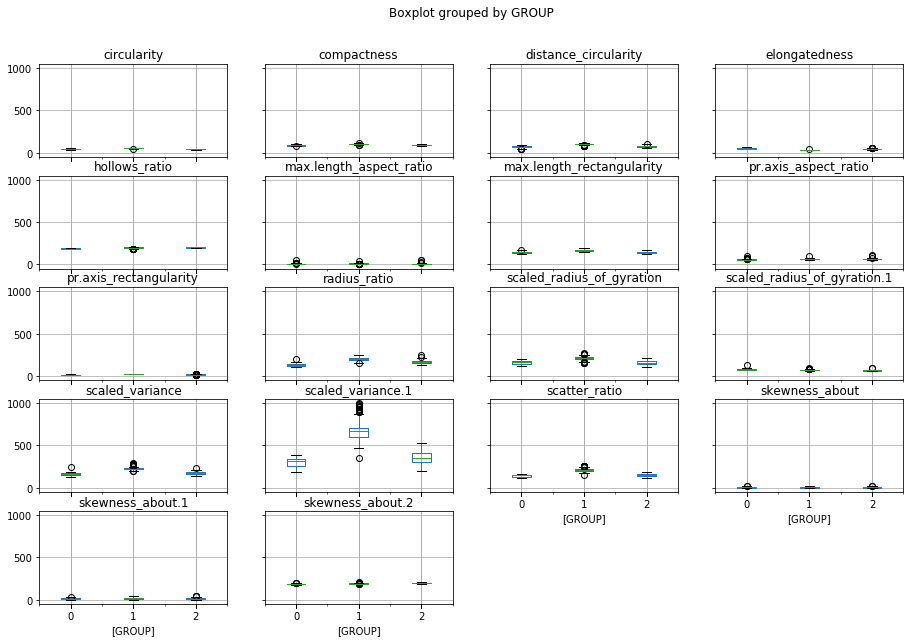

In [46]:
Data_lookup.boxplot(by='GROUP' ,figsize=(15,10))

1) The  high skewness vehicles  will be Group 1  which is mostly car and BUS

2) Group 2 is equally distributed between the 3 where we cannot make any inference 

Try the K MEANS with 4 components 

# KMEANS with K = 4

In [52]:
# Let us first start with K = 4
final_model=KMeans(4)
final_model.fit(scaled_df)
prediction=final_model.predict(scaled_df)
#Append the prediction 
Data_lookup["GROUP1"] = prediction

print("Groups Assigned : \n")
Data_lookup

Groups Assigned : 



compactness  circularity  distance_circularity  radius_ratio  \
0             95         48.0                  83.0         178.0   
1             91         41.0                  84.0         141.0   
2            104         50.0                 106.0         209.0   
3             93         41.0                  82.0         159.0   
4             85         44.0                  70.0         205.0   
..           ...          ...                   ...           ...   
841           93         39.0                  87.0         183.0   
842           89         46.0                  84.0         163.0   
843          106         54.0                 101.0         222.0   
844           86         36.0                  78.0         146.0   
845           85         36.0                  66.0         123.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                    72.0                       10          162.0   
1                    57.0                        9          149.0   
2                    66.0                       10          207.0   
3                    63.0                        9          144.0   
4                   103.0                       52          149.0   
..                    ...                      ...            ...   
841                  64.0                        8          169.0   
842                  66.0                       11          159.0   
843                  67.0                       12          222.0   
844                  58.0                        7          135.0   
845                  55.0                        5          120.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0             42.0                    20.0                        159   
1             45.0                    19.0                        143   
2             32.0                    23.0                        158   
3             46.0                    19.0                        143   
4             45.0                    19.0                        144   
..             ...                     ...                        ...   
841           40.0                    20.0                        134   
842           43.0                    20.0                        159   
843           30.0                    25.0                        173   
844           50.0                    18.0                        124   
845           56.0                    17.0                        128   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0              176.0              379.0                      184.0   
1              170.0              330.0                      158.0   
2              223.0              635.0                      220.0   
3              160.0              309.0                      127.0   
4              241.0              325.0                      188.0   
..               ...                ...                        ...   
841            200.0              422.0                      149.0   
842            173.0              368.0                      176.0   
843            228.0              721.0                      200.0   
844            155.0              270.0                      148.0   
845            140.0              212.0                      131.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                           70.0             6.0              16.0   
1                           72.0             9.0              14.0   
2                           73.0            14.0               9.0   
3                           63.0             6.0              10.0   
4                          127.0             9.0              11.0   
..                           ...             ...               ...   
841                         72.0             7.0              25.0   
842                         72.0             1.0              20.0   

In [53]:
from sklearn.metrics import silhouette_samples, silhouette_score
# Calculating silhouette_score
labels = final_model.labels_
silhouette_score(scaled_df,labels)

0.30009553403833833

In [54]:
techClust = Data_lookup.groupby(['GROUP1'])
techClust.mean()

compactness  circularity  distance_circularity  radius_ratio  \
GROUP1                                                                 
0         91.823718    41.419872             77.391026    168.596154   
1         86.178423    41.506224             67.975104    132.141079   
2        103.239044    52.107570            101.378486    201.996016   
3         86.500000    43.750000             75.500000    233.000000   

        pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
GROUP1                                                                 
0                  63.391026                 7.830128     154.086538   
1                  57.112033                 7.145228     142.493776   
2                  62.549801                 9.665339     211.768924   
3                 101.750000                49.000000     148.250000   

        elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
GROUP1                                                                     
0           43.304487               19.352564                 140.378205   
1           47.850622               18.622407                 140.676349   
2           31.466135               23.928287                 163.924303   
3           45.500000               19.000000                 149.500000   

        scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
GROUP1                                                                  
0            175.894231         360.528846                 155.676282   
1            163.087137         299.879668                 160.958506   
2            226.107570         669.115538                 209.565737   
3            218.000000         323.250000                 175.250000   

        scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
GROUP1                                                                  
0                         67.657051        6.096154         12.583333   
1                         78.095436        5.892116         10.232365   
2                         71.593625        7.163347         15.258964   
3                        101.750000        6.750000         11.500000   

        skewness_about.2  hollows_ratio  
GROUP1                                   
0             194.032051     200.900641  
1             182.634855     187.697095  
2             188.960159     197.171315  
3             184.750000     192.500000

In [55]:
pd.crosstab(Data_lookup['class'] ,Data_lookup['GROUP1'] )

GROUP1    0   1    2  3
class                  
bus      82  78   42  1
car     130  74  209  0
van     100  89    0  3

In [56]:
techClust1 = Data_lookup.groupby(['GROUP1'])
techClust1.mean()

compactness  circularity  distance_circularity  radius_ratio  \
GROUP1                                                                 
0         91.823718    41.419872             77.391026    168.596154   
1         86.178423    41.506224             67.975104    132.141079   
2        103.239044    52.107570            101.378486    201.996016   
3         86.500000    43.750000             75.500000    233.000000   

        pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
GROUP1                                                                 
0                  63.391026                 7.830128     154.086538   
1                  57.112033                 7.145228     142.493776   
2                  62.549801                 9.665339     211.768924   
3                 101.750000                49.000000     148.250000   

        elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
GROUP1                                                                     
0           43.304487               19.352564                 140.378205   
1           47.850622               18.622407                 140.676349   
2           31.466135               23.928287                 163.924303   
3           45.500000               19.000000                 149.500000   

        scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
GROUP1                                                                  
0            175.894231         360.528846                 155.676282   
1            163.087137         299.879668                 160.958506   
2            226.107570         669.115538                 209.565737   
3            218.000000         323.250000                 175.250000   

        scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
GROUP1                                                                  
0                         67.657051        6.096154         12.583333   
1                         78.095436        5.892116         10.232365   
2                         71.593625        7.163347         15.258964   
3                        101.750000        6.750000         11.500000   

        skewness_about.2  hollows_ratio  
GROUP1                                   
0             194.032051     200.900641  
1             182.634855     187.697095  
2             188.960159     197.171315  
3             184.750000     192.500000

#The KMEANS with 3 was showing better than K with 4 in terms of clustering as one goup in KMEANS as 4 is negligible.

#The SKewness measure was  clustering BUS and Car  in Group 2 , VAN was almost NIL in this group( K MEANS = 3)

#Clustering was not coming perfect as the vehicles did nt get segmented as we expected. 

# Herarichal Clustering

In [59]:
#from sklearn.cluster import AgglomerativeClustering 
#model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')
#model.fit(scaled_df)

#### generate the linkage matrix
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(scaled_df, 'ward', metric='euclidean')
Z.shape

(807, 4)

In [67]:
#Data_final['labels'] = model.labels_


#Data_final.groupby(["labels"]).count()

#Data_final.head()



In [60]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

#Z = linkage(scaled_df, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(scaled_df))

c


0.6389717758812881

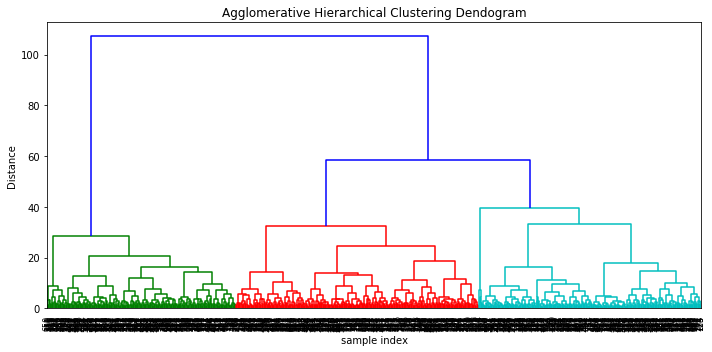

In [61]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z ,leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

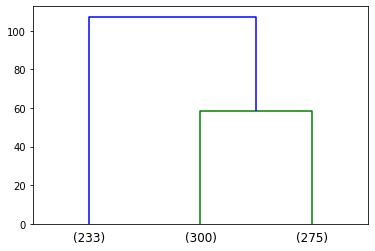

In [62]:
# Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=3,  # show only the last p merged clusters
)
plt.show()

#Try with a different method other than ward to see the cluster formation. 

In [63]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(scaled_df,'complete', metric='euclidean', )
c, coph_dists = cophenet(Z , pdist(scaled_df))

c


0.7036486292152169

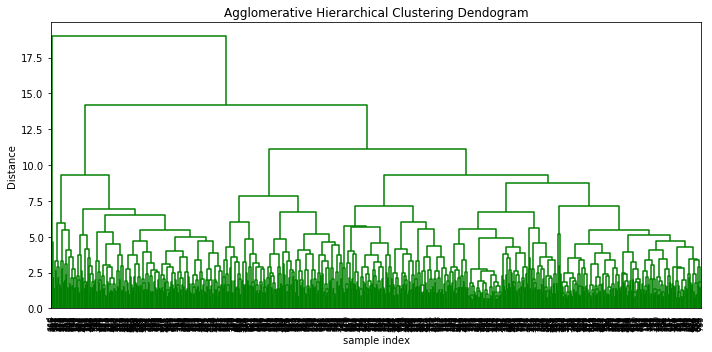

In [64]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z ,leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

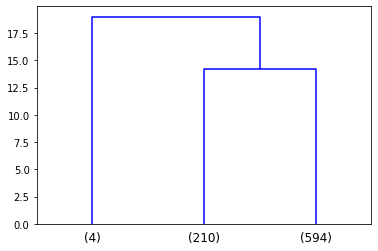

In [65]:
# Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=3,  # show only the last p merged clusters
)
plt.show()

# Observations
#The Ward method was better performing  than other types including the "complete" method for the Herarichal clustering. 

#Group 0 was coming with less data which was not expected. , and majority of data was coming in the group 1 and group 2

#K MEANS  clustering type was performing better than the Herarichal Clustering type in terms on the grouping pattern of the DATA

# PCA

In [69]:
# PCA
# Step 1 - Create covariance matrix

cov_matrix = np.cov(scaled_df.T)
print('Covariance Matrix \n%s', cov_matrix)


Covariance Matrix 
%s [[ 1.00123916e+00  6.90889750e-01  7.90524454e-01  7.31507275e-01
   1.50369592e-01  2.27400806e-01  8.14110437e-01 -7.88198474e-01
   8.14677503e-01  6.76572768e-01  7.84523542e-01  8.20592841e-01
   5.81732984e-01 -2.77016970e-01  2.31467875e-01  1.68895153e-01
   2.98860760e-01  3.77736284e-01]
 [ 6.90889750e-01  1.00123916e+00  7.98740407e-01  6.46140614e-01
   1.83920122e-01  3.05366470e-01  8.59831468e-01 -8.26313930e-01
   8.58306275e-01  9.66777992e-01  8.17000862e-01  8.53024320e-01
   9.36500068e-01  3.94688738e-02  1.45118545e-01 -5.77335000e-04
  -1.10350945e-01  5.46076115e-02]
 [ 7.90524454e-01  7.98740407e-01  1.00123916e+00  8.07887558e-01
   2.16277386e-01  3.47495855e-01  9.11498976e-01 -9.14166571e-01
   9.00492141e-01  7.74402298e-01  8.84452402e-01  8.94902533e-01
   7.06686615e-01 -2.65993869e-01  1.10781583e-01  2.78446850e-01
   1.47142428e-01  3.46810920e-01]
 [ 7.31507275e-01  6.46140614e-01  8.07887558e-01  1.00123916e+00
   6.54451679e-

In [70]:
# Step 2- Get eigen values and eigen vector
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-2.73698283e-01 -1.00217697e-01 -1.59771454e-01 -1.07590066e-01
   3.66079422e-02  1.39740933e-02  4.19002073e-01  6.14788769e-01
   4.58129252e-01  2.76498876e-01 -6.79094337e-02 -4.13967690e-02
   1.57246909e-01 -3.27537941e-04  7.75120533e-03 -6.50271507e-02
  -3.46599802e-02 -1.92140669e-03]
 [-2.90299055e-01  1.40737438e-01  4.01683287e-02 -1.86368693e-01
  -7.31206070e-02 -1.74935779e-01 -3.33793404e-01  1.55370515e-01
  -4.54963074e-03 -7.74098668e-02  4.65655538e-02  1.28625981e-01
  -4.40153330e-02 -1.94956520e-02  1.79522046e-01  2.42008870e-01
  -6.64260997e-01 -3.59141927e-01]
 [-3.03152607e-01 -5.27983883e-02 -7.18817023e-02  5.67222151e-02
   5.71972866e-02 -1.29742460e-01  2.63265527e-03 -4.10935968e-01
   2.44964059e-01  1.39216854e-01 -7.25887810e-01  3.48510287e-02
  -2.78102441e-01  1.11298761e-02 -2.90007819e-02 -5.84232272e-02
   3.05026836e-02 -1.33343535e-01]
 [-2.76499699e-01 -2.00472472e-01  1.95933385e-01  8.74767011e-02
  -6.22060616e-02  

In [71]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 53.3089397   70.90094076  78.73058933  85.2368627   90.46351669
  94.00073696  96.2479245   97.49967634  98.3937283   98.91924954
  99.25619785  99.50762364  99.69182165  99.80703529  99.89123209
  99.96386595  99.99799544 100.        ]


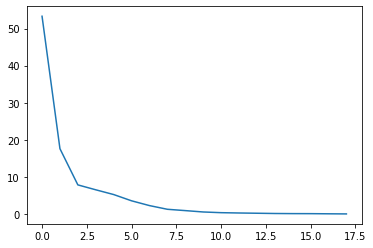

In [72]:
plt.plot(var_exp)

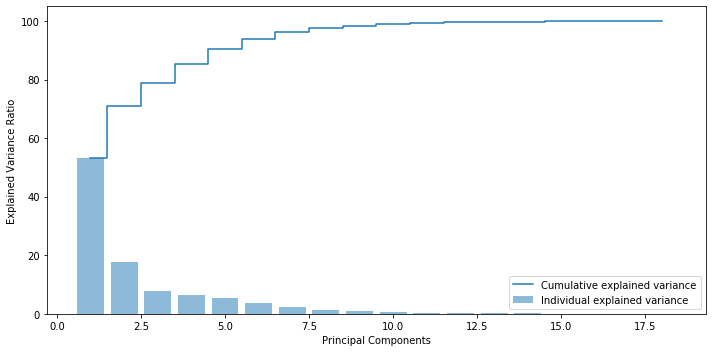

In [73]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [74]:
# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot

# choose 7 components to have a 95 % variance from the graph above.

from sklearn.decomposition import PCA

# NOTE - we are generating only 7 PCA dimensions (dimensionality reduction from 17 to 7)

pca = PCA(n_components=7)
data_reduced = pca.fit_transform(scaled_df)
data_reduced.transpose()

array([[ 0.44463703, -1.57814728,  3.85061367, ...,  4.93722941,
        -3.25769177, -4.82006944],
       [-0.39133419, -0.33666072,  0.293369  , ...,  0.03399124,
        -1.050085  ,  0.35126577],
       [ 1.38149151, -0.44931017,  0.30548603, ...,  0.98814165,
        -0.72804304, -0.79753564],
       ...,
       [ 0.2486202 ,  0.77469344,  0.54383021, ..., -1.10049096,
         0.1517922 , -0.05737453],
       [-0.00989174, -0.58614642,  0.89044596, ..., -0.55791783,
        -0.42696366, -0.38633212],
       [-1.17738043,  0.13057368,  0.28428129, ...,  0.54475256,
        -0.37537438, -0.17009791]])

In [75]:
pca.components_

array([[ 0.27369828,  0.29029906,  0.30315261,  0.2764997 ,  0.09617928,
         0.1142775 ,  0.31454295, -0.31163175,  0.31153854,  0.27780271,
         0.30847932,  0.31213205,  0.26587331, -0.04375431,  0.04070001,
         0.06417797,  0.03769458,  0.08651563],
       [-0.1002177 ,  0.14073744, -0.05279839, -0.20047247, -0.20873181,
        -0.03779548,  0.06349542, -0.00211306,  0.07688066,  0.12704541,
         0.0629446 ,  0.06756489,  0.21217248,  0.49389202, -0.04046073,
        -0.09771204, -0.52569229, -0.52065066],
       [-0.15977145,  0.04016833, -0.0718817 ,  0.19593338,  0.64700405,
         0.57290059, -0.09539311,  0.04798149, -0.10973374,  0.05060159,
        -0.02019027, -0.10915184,  0.04944116,  0.21930878, -0.13775723,
        -0.26724457, -0.0543991 , -0.01583638],
       [ 0.10759007,  0.18636869, -0.05672222, -0.0874767 , -0.07626056,
        -0.03432441, -0.08191181,  0.08442763, -0.07545134,  0.18979295,
        -0.1223251 , -0.07681649,  0.2001014 , -0.105

In [76]:
df_comp = pd.DataFrame(pca.components_,columns=list(scaled_df))
df_comp

0.163086   0.524687   0.061762   0.297011   1.669599   0.433237  \
   -0.323612  -0.614955   0.125092  -0.849758  -0.703515   0.162506   
    1.258156   0.850299   1.518345   1.257817   0.720354   0.433237   
   -0.080263  -0.614955  -0.001568  -0.291871   0.245731   0.162506   
  -1.053658  -0.126537  -0.761524   1.133842   6.574036   11.803951   
    0.406435  -0.289343  -0.571535   0.142042   0.562146  -0.649688   
   -0.445286  -0.289343  -1.014843  -0.353858   0.562146   0.162506   
   -0.931984  -1.754597  -1.268162  -0.880752  -0.070684  -0.378957   
   -0.931984  -1.428985  -0.761524  -0.787770  -0.070684   0.162506   
   -0.445286  -1.754597  -1.014843  -1.004727  -1.019930  -0.649688   
   -0.688635   0.199075  -0.508205   0.080054   1.036769  -0.649688   
   -0.566961  -0.452149   0.188422  -0.756777  -0.545307   0.433237   
    0.041411   0.687493  -0.191557   1.071854   1.511392  -0.920419   
    0.284760   1.664329   1.328356   1.009867   0.562146   0.162506   
   -0.566961  -1.428985  -1.964789  -1.841558  -1.494553  -0.649688   
    0.649784  -0.614955  -0.318216   0.885892   1.194977  -0.649688   
    1.258156   1.501523   1.138367   0.544960  -0.070684   0.433237   
   -1.175333   0.361881  -0.444876  -0.477833   0.403939  -0.649688   
   -1.175333  -1.266179  -1.838129  -1.469633  -0.387100  -0.920419   
    0.041411  -0.289343  -1.141502   0.142042   1.194977  -0.378957   
   -0.810309  -0.940567  -0.761524  -0.632802  -0.070684  -0.378957   
    0.649784   1.338717   1.455016   1.567754   0.720354   0.703968   
   -1.053658   0.036269  -0.128227  -0.446839   0.403939   0.162506   
   -1.297007  -1.428985  -1.774799  -1.531620  -0.703515  -0.649688   
    1.623179   1.501523   1.011708   1.071854   0.562146   0.703968   
    1.014807   0.036269   0.188422   0.761917   0.403939  -0.649688   
   -1.662030  -1.103373  -1.204832  -1.221683  -1.019930  -0.378957   
   -0.566961  -0.289343   0.188422  -0.260877   0.403939   0.703968   
   -0.688635  -0.452149  -0.318216  -0.539820  -0.545307  -0.108226   
   -0.080263  -1.591791  -1.014843  -0.446839  -0.387100  -0.649688   
    0.893132   0.524687   1.581675   1.660735   1.036769   0.433237   
   -0.810309  -1.103373   0.188422   0.266017  -0.070684  -0.108226   
   -1.418681  -0.126537  -0.634865  -1.562614  -1.494553  -0.378957   
    1.501504   1.338717   1.011708   0.235023  -1.178138   0.433237   
   -1.540356   0.036269  -0.888183   0.018067   1.827807  -0.649688   
    0.163086   0.524687   1.391686   1.412785   0.878561   0.162506   
   -0.688635  -1.266179  -1.964789  -1.965533  -1.494553  -0.920419   
    0.041411   0.687493   0.315081  -0.973733  -1.178138   0.703968   
   -0.080263  -1.266179  -0.381546   0.451979   0.245731  -0.108226   
    3.083272   1.501523   1.518345   1.598748   0.562146   0.974700   
   -0.080263   0.199075  -0.001568  -0.725783  -0.545307   0.703968   
   -0.323612  -0.289343  -0.761524  -1.097708  -1.019930  -0.108226   
   -1.053658  -0.452149  -1.014843  -1.438639  -1.178138  -0.649688   
   -0.566961   0.361881  -0.064897  -0.663795   0.403939   0.703968   
   -0.323612   0.036269  -0.191557   0.235023  -0.387100   0.162506   
   -1.905379  -1.103373  -1.204832  -1.655595  -1.652761  -0.649688   
   -0.201937  -1.103373  -0.698194   0.173036   0.720354  -0.378957   
    0.528109   1.664329   1.201697   1.846698   1.353184   0.162506   
    0.893132  -0.452149  -1.268162   0.204029   0.878561  -0.649688   
    0.893132   1.827135   1.391686   0.513967  -1.336345  -0.649688   
    0.041411  -1.428985  -1.014843  -0.539820  -0.070684  -0.108226   
    0.406435  -0.126537   0.885048   0.823904   0.245731   0.162506   
   -0.566961   0.361881   0.125092  -1.097708  -1.019930   0.703968   
    1.623179   1.338717   1.328356   1.629741   0.720354   0.703968   
   -1.053658  -0.940567  -0.888183  -1.531620  -1.494553  -0.920419   
    1.136481   0.850299   1.011708   1.350798   0.245731   0.162506   
   -2.027053  -1.103373  -1.

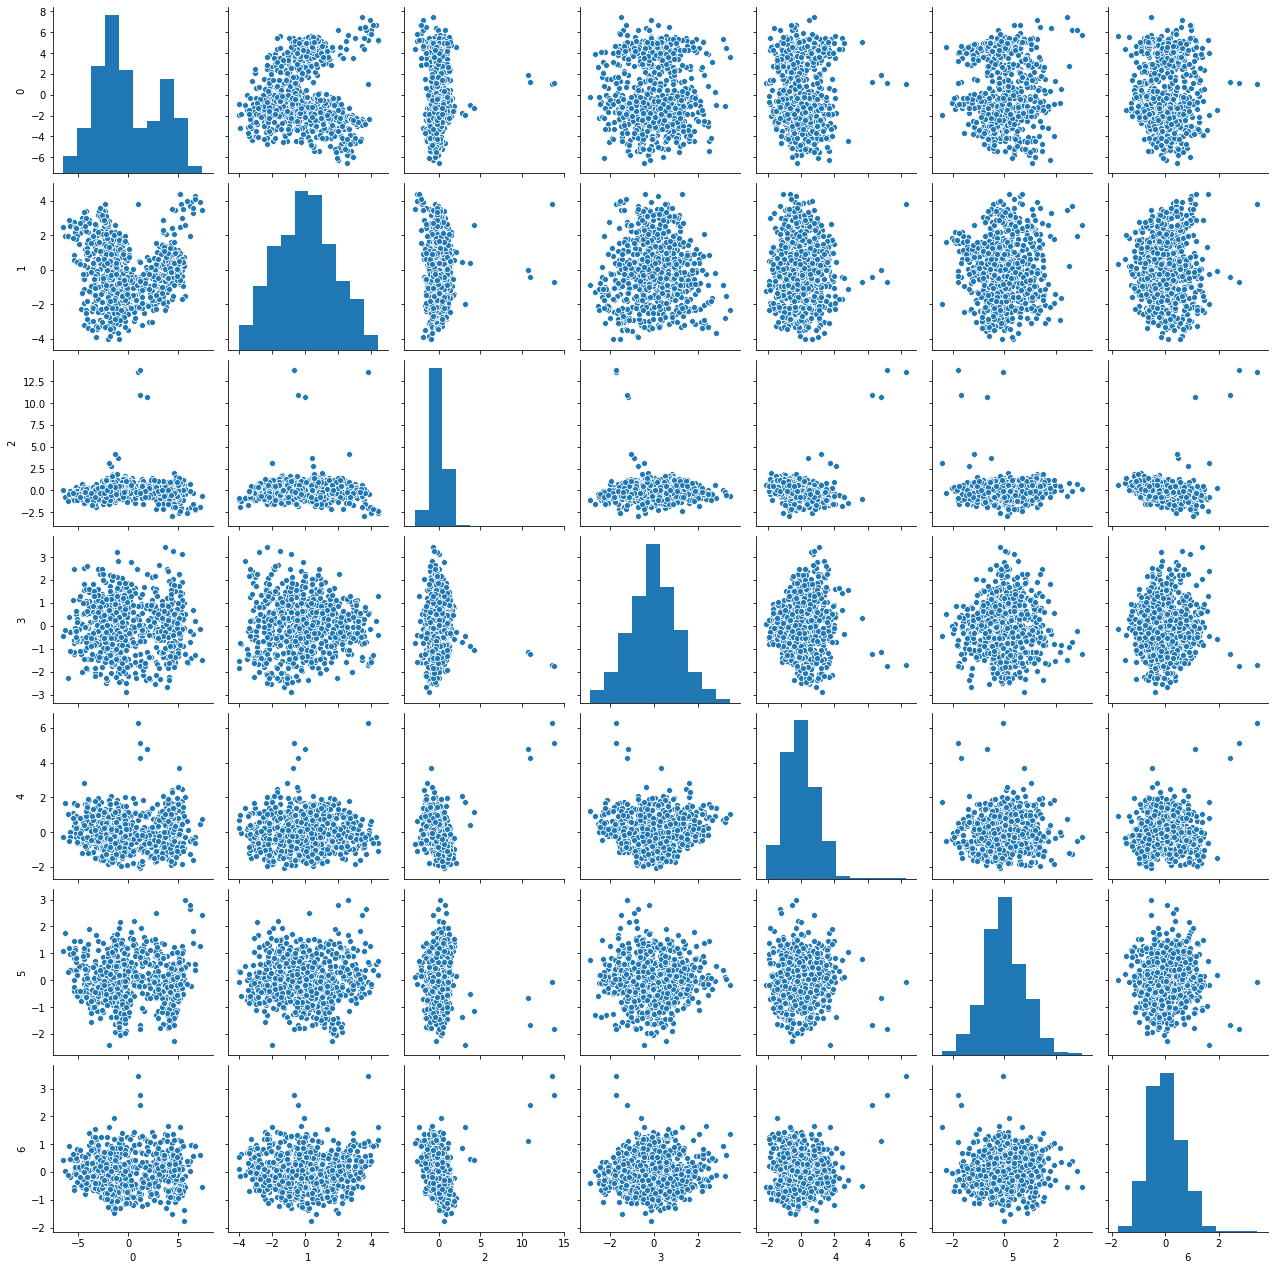

In [77]:
sns.pairplot(pd.DataFrame(data_reduced))


#If we see the pairplot the correlation between each components is very less and also refer to the CORR matrix above , we see very less Correlation between each of the components. 

# Try the clustering method will reduced components 

In [120]:
# Let us first start K MEANS  with K = 3

final_model=KMeans(3)
final_model.fit(data_reduced)
prediction=final_model.predict(data_reduced)

#Append the prediction 
Data_lookup["GROUP1"] = prediction

print("Groups Assigned : \n")
Data_lookup

Groups Assigned : 



compactness  circularity  distance_circularity  radius_ratio  \
0             95         48.0                  83.0         178.0   
1             91         41.0                  84.0         141.0   
2            104         50.0                 106.0         209.0   
3             93         41.0                  82.0         159.0   
4             85         44.0                  70.0         205.0   
..           ...          ...                   ...           ...   
841           93         39.0                  87.0         183.0   
842           89         46.0                  84.0         163.0   
843          106         54.0                 101.0         222.0   
844           86         36.0                  78.0         146.0   
845           85         36.0                  66.0         123.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                    72.0                       10          162.0   
1                    57.0                        9          149.0   
2                    66.0                       10          207.0   
3                    63.0                        9          144.0   
4                   103.0                       52          149.0   
..                    ...                      ...            ...   
841                  64.0                        8          169.0   
842                  66.0                       11          159.0   
843                  67.0                       12          222.0   
844                  58.0                        7          135.0   
845                  55.0                        5          120.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0             42.0                    20.0                        159   
1             45.0                    19.0                        143   
2             32.0                    23.0                        158   
3             46.0                    19.0                        143   
4             45.0                    19.0                        144   
..             ...                     ...                        ...   
841           40.0                    20.0                        134   
842           43.0                    20.0                        159   
843           30.0                    25.0                        173   
844           50.0                    18.0                        124   
845           56.0                    17.0                        128   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0              176.0              379.0                      184.0   
1              170.0              330.0                      158.0   
2              223.0              635.0                      220.0   
3              160.0              309.0                      127.0   
4              241.0              325.0                      188.0   
..               ...                ...                        ...   
841            200.0              422.0                      149.0   
842            173.0              368.0                      176.0   
843            228.0              721.0                      200.0   
844            155.0              270.0                      148.0   
845            140.0              212.0                      131.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                           70.0             6.0              16.0   
1                           72.0             9.0              14.0   
2                           73.0            14.0               9.0   
3                           63.0             6.0              10.0   
4                          127.0             9.0              11.0   
..                           ...             ...               ...   
841                         72.0             7.0              25.0   
842                         72.0             1.0              20.0   

In [115]:
from sklearn.metrics import silhouette_samples, silhouette_score
# Calculating silhouette_score
labels = final_model.labels_
silhouette_score(data_reduced,labels)

0.3116244695067428

In [116]:
Data_final.groupby(["GROUP1"]).count()

compactness  circularity  distance_circularity  radius_ratio  \
GROUP1                                                                 
0               238          238                   238           238   
1               314          314                   314           314   
2               256          256                   256           256   

        pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
GROUP1                                                                 
0                        238                      238            238   
1                        314                      314            314   
2                        256                      256            256   

        elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
GROUP1                                                                     
0                 238                     238                        238   
1                 314                     314                        314   
2                 256                     256                        256   

        scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
GROUP1                                                                  
0                   238                238                        238   
1                   314                314                        314   
2                   256                256                        256   

        scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
GROUP1                                                                  
0                               238             238               238   
1                               314             314               314   
2                               256             256               256   

        skewness_about.2  hollows_ratio  
GROUP1                                   
0                    238            238  
1                    314            314  
2                    256            256

In [121]:
pd.crosstab(Data_lookup['class'] ,Data_lookup["GROUP1"]  )

GROUP1   0    1    2
class               
bus     79   43   81
car     73  212  128
van     87    1  104

In [81]:
# herarichal clustering using ward

#### generate the linkage matrix
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(data_reduced, 'ward', metric='euclidean')
Z.shape

(807, 4)

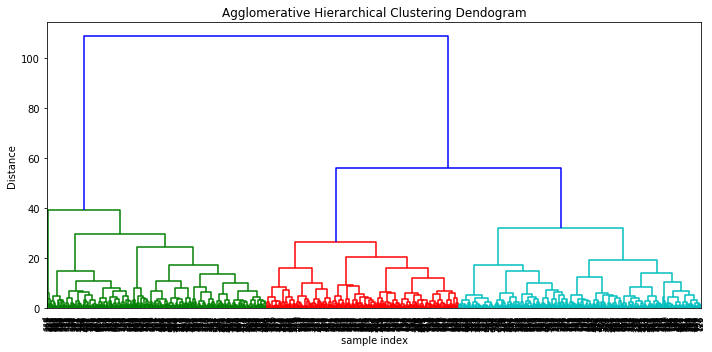

In [82]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z ,leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()


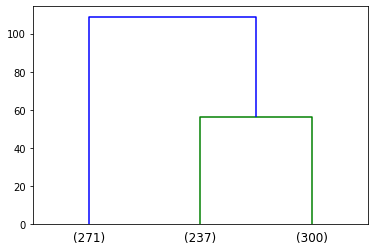

In [83]:
# Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=3,  # show only the last p merged clusters
)
plt.show()

In [85]:
# Clustering has not much improved after the PCA components reduction.

# Classification using SVM

In [102]:
#split the dataset into training and test datasets

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(scaled_df, y, test_size=0.3, random_state=7)

In [103]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
            }
    }
}

In [104]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

model  best_score                 best_params
0   svm    0.976991  {'C': 10, 'kernel': 'rbf'}

In [105]:
# Building a Support Vector Machine on train data
svc_model = SVC(C= 10, kernel='linear', gamma= 1)
svc_model.fit(X_train, y_train)

pred_SVC = svc_model .predict(X_test)

In [106]:
# check the accuracy on the training set
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

0.9893805309734514
0.9588477366255144


In [107]:
# y_pred = NNH.predict(X_test)

SVC_score = svc_model.score(X_test, y_test)
print(f"Score : {SVC_score}")

Score : 0.9588477366255144


In [108]:
print("Confusion Matrix:\n",confusion_matrix(pred_SVC,y_test))

Confusion Matrix:
 [[ 55   5   2]
 [  1 128   1]
 [  1   0  50]]


In [109]:
print("Classification Matrix:\n",classification_report(pred_SVC,y_test))

Classification Matrix:
               precision    recall  f1-score   support

         bus       0.96      0.89      0.92        62
         car       0.96      0.98      0.97       130
         van       0.94      0.98      0.96        51

    accuracy                           0.96       243
   macro avg       0.96      0.95      0.95       243
weighted avg       0.96      0.96      0.96       243



In [110]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

num_folds = 50
seed = 7

kfold = KFold(n_splits=num_folds, random_state=seed)
svc_model = SVC(C= 10, kernel='linear', gamma= 1)
results = cross_val_score(svc_model, X_train, y_train, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

C:\Users\VIBIVIJAYAN\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


[0.91666667 1.         0.83333333 1.         1.         1.
 0.83333333 0.91666667 0.83333333 1.         1.         1.
 1.         0.91666667 1.         0.90909091 1.         1.
 1.         0.90909091 0.90909091 1.         1.         1.
 1.         1.         1.         0.90909091 0.90909091 0.90909091
 1.         1.         1.         1.         0.90909091 1.
 0.90909091 1.         0.90909091 1.         1.         1.
 1.         1.         1.         0.81818182 1.         1.
 1.         1.        ]
Accuracy: 96.500% (5.484%)


The Accuracy is 96.5 % with a STD of 5.48% which is very good. 

#  Classification with PCA labels

In [99]:
# with 7 components from the pCA

In [96]:
#split the dataset into training and test datasets

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(data_reduced, y, test_size=0.3, random_state=7)

In [97]:
# Building a Support Vector Machine on train data
svc_model = SVC(C= 10, kernel='linear', gamma= 1)
svc_model.fit(X_train, y_train)

pred_SVC = svc_model .predict(X_test)

In [98]:
# check the accuracy on the training set
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))


0.8194690265486726
0.8271604938271605


In [99]:
print("Confusion Matrix:\n",confusion_matrix(pred_SVC,y_test))

Confusion Matrix:
 [[ 40  11   2]
 [ 14 113   3]
 [  3   9  48]]


In [100]:
print("Classification Matrix:\n",classification_report(pred_SVC,y_test))

Classification Matrix:
               precision    recall  f1-score   support

         bus       0.70      0.75      0.73        53
         car       0.85      0.87      0.86       130
         van       0.91      0.80      0.85        60

    accuracy                           0.83       243
   macro avg       0.82      0.81      0.81       243
weighted avg       0.83      0.83      0.83       243



With the PCA labels reduced to 7( variance ratio of 95%) , the F1 scrore has come down to 82% compared to the one with out any PCA where the accuracy was coming 96% 

#Try the KFOLD with the reduced Data

In [101]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

num_folds = 50
seed = 7

kfold = KFold(n_splits=num_folds, random_state=seed)
svc_model = SVC(C= 10, kernel='linear', gamma= 1)
results = cross_val_score(svc_model, X_train, y_train, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

C:\Users\VIBIVIJAYAN\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


[0.75       1.         0.75       0.91666667 0.91666667 0.5
 0.5        0.83333333 0.66666667 0.91666667 0.75       0.75
 0.83333333 0.75       0.66666667 0.63636364 0.81818182 0.81818182
 0.90909091 0.81818182 0.63636364 0.72727273 0.90909091 0.81818182
 0.81818182 0.81818182 0.72727273 0.72727273 0.90909091 1.
 0.72727273 0.90909091 0.81818182 0.81818182 0.90909091 0.81818182
 0.81818182 1.         0.81818182 0.90909091 0.54545455 0.90909091
 0.72727273 1.         0.81818182 0.54545455 0.63636364 0.81818182
 0.81818182 0.81818182]
Accuracy: 79.545% (12.286%)


In [111]:
# accuracy Score will be varying from 67 till 91 % with 1 STD variance confidence interval
# The accuracy of the BUS is always less in both  the classification approaches. 